# Classificador Bayesiano

Um problema de classificação pode ser apresentado como um modelo que computa probabilidades condicionais de uma classe dado uma amostra dos dados. O Teorema de Bayes (ou teorema Bayesiano) oferece um método para fazer esse calculo, embora na prática seja necessário uma quantidade muito grande de amostras, o que pode se tornar caro em termos computacionais.

Em vez disso, o calculo do Teorema de Bayes pode ser simplificado assumindo algumas propriedades, como cada variável (característica) sendo considerada independente de todas as demais. Apesar de assumir um cenário dramático e irreal, tem o efeito de tornar o calculo da probabilidade condicional tratável e resulta em um modelo de classificação efetivo chamado Naive Bayes.

## Classificação baseada em probabilidades condicionais

Uma das abordagens para resolver problemas de classificação é através de modelos probabilísticos, cujo objetivo é estimar a probabilidade condicional da classe, dada a observação (amostra).

Como exemplo, um prolema de classificação pode compreender $k$ rótulos $y_1, y_2\dots y_k$ e $n$ características, $x_1, x_2,\dots x_n$. Podemos calcular a probabilidade de predizer a classe de uma instância condicionada ao valor de cada coluna $x_1, x_2,\dots x_n$ da seguinte maneira:

\begin{equation}
    P(y_i | x_1, x_2,\dots, x_n)
\end{equation}

A probabilidade condicional pode ser computada para cada classe e o rótulo com maior probabilidade pode ser retornado como a classificação mais provável.

A probabilidade condicional pode ser calculada usando a probabilidade conjunta, embora seja intratável. O Teorema de Bayes oferece uma maneira simples de computar a probabilidade conjunta:

<img src="assets/teoremaBayes.jpeg" width="400"/>

Onde a probabilidade que estamos interessados em calcular $P(A|B)$ é chamada de probabilidade a posteriori e a probabilidade marginal de um evento $P(A)$ é chamada priori.

Nota: O termo "marginal" vem da ideia de que são encontrados através dos valores em uma linha ou coluna, e seria colocano no final da linha ou coluna, ou seja, na margem. Como exemplo, $P(A) = 1$ é igual a soma (depois normalizada) de todas as amostras de classe $1$. Por isso é chamada a priori, podemos encontrar esse valor só de olhar os dados, no "princípio" do processo.

Podemos apresentar o problema de classificação condicional usando o Teorema de Bayes da seguinte maneira:

\begin{equation}
    P(y_i | x_1, x_2,\dots, x_n) = \frac{P(x_1, x_2,\dots, x_n| y_i) * P(y_i)}{P(x_1, x_2,\dots, x_n)}
\end{equation}

O valor a priori $P(y_i)$ é facil de estimar a partir do dataset, mas a probabilidade condicional da observação baseada na classe $P(x_1, x_2,\dots, x_n| y_i)$ não é factível a não ser que o número de amostras seja extraordinariamente grande, ou seja, grande o suficiente para estimar a distribuição de probabilidades para todas as possíveis combinações de valores.

Desse modo, uma aplicação direta do Teorema de Bayes também se torna intratável, especialmente quando o número de características das amostras ($n$) é grande.

## Simplificação - Naive Bayes

A solução para usar o Teorema de Bayes um modelo de classificação de probabilidade condicional é simplificar o cálculo. O Teorema de Bayes assume que cada variável (característica) é dependente de todas as outras, e é isso que causa a complexidade no cálculo. Podemos remover essa suposição e considerar cada variável como independente uma das outras.

Isso muda o conceito de um modelo de probabilidade condicional dependente para um modelo de probabilidade condicional independente, simplificando drásticamente os calculos.

Primeiramente, o denominador é removido do calculo $P(x_1, x_2,\dots, x_n)$ uma vez que esse termo é uma constante usada para calcular a probabilidade condicional de cada classe para uma determinada instância e tem o efeito de normalizar o resultado.

\begin{equation}
    P(y_i | x_1, x_2,\dots, x_n) = P(x_1, x_2,\dots, x_n| y_i) * P(y_i)
\end{equation}

Em seguida, a probabilidade condicional de todas as variáveis dado o rótulo é mudada para diferentes probabilidades condicionais de cada variável dado o rótulo. Essas variáveis condicionais independentes são então multiplicadas juntas. Por exemplo:

\begin{equation}
    P(y_i | x_1, x_2,\dots, x_n) = P(x_1|yi) * P(x2|yi) * \dots * P(x_n|yi) * P(y_i)
\end{equation}

Esse calculo pode ser executado para cada rótulo, e o rótulo com maior probabilidade pode ser selecionado como a classe da instância. Essa regra de decisão é conhecida como "Máximo a posteriori" ou MAP.

Essa simplificação do Theorema de Bayes é comum e muito utilizada para problemas de classificação, conhecida como Naive Bayes. Note que a palavra "naive" vem do francês _naïve_, que quer dizer ingênuo, e "Bayes" vem do nome do criador do teorema, Thomas Bayes.

# Como computar a probabilidade condicional e a priori 

Calcular a probabilidade a priori $P(y_i)$ é simples. Pode ser estimado dividindo a frequência das observações no conjunto de treinamento com classe $y_i$ pelo total de amostras de treinamento:

\begin{equation}
    P(y_i) = \frac{\text{exemplos com } y_i}{\text{ total de exemplos}}
\end{equation}

A probabilidade condicional de uma característica dado o rótulo também pode ser estimado a partir dos dados. Para isso, precisamos considerar o número de classes e uma distribuição dos dados por características. Em outras palavras, se temos $k$ classes e $n$ características, temos $k*n$ diferentes distribuições de probabilidades que precisarão ser criadas e armazenadas.

Uma abordagem diferente pode ser necessária dependendo do tipo do dado de cada característica. Especificamente, os dados são usados para estimar os parâmetros de uma entre três distribuições de probabilidade padrão

No caso de variáveis categóricas, como contagens ou rótulos, uma distribuição multinomial pode ser usada. Se as variáveis são binárias, podemos usar uma distribuição binomial. E se a variável for numérica usamos uma distribuição Gaussiana.

- Binaria: distribuição binomial.
- Categorica: distribuição multinomial.
- Numerica: distribuição Gaussiana.

Essas distribuições são tão comuns que as implementações do Naive Bayes geralmente são nomeadas em conjunto com a distribuição:


- Binomial Naive Bayes: Naive Bayes que usa a distribuição binomial.
- Multinomial Naive Bayes: Naive Bayes que usa a distribuição multinomial.
- Gaussian Naive Bayes: Naive Bayes que usa a distribuição Gaussiana.

Datasets com características de tipos mistos podem necessitar a seleção de diferentes tipos de distribuições de dados para cara característica.

Usar uma das três distribuições comuns não é obrigatório; por exemplo, se soubermos que uma variável real pode ser modelada por uma distribuição diferente, como uma exponencial, podemos utilizar essa distribuição nesse caso. Se uma variável do tipo real não pertence a uma distribuição bem definida, como binomial ou multimodal, podemos usar um kernel estimador de densidade para escolher a melhor distribuição de probabilidade.


O algoritmo Naive Bayes se mostrou eficiente e popular para tarefas de classificação de texto. As palavras em um documento podem ser codificadas como valores binário (se existe a palavra no texto), categóricas (contagem de aparições), ou frequência que aparecem no texto (valor real), sendo representadas por distribuições de probabilidades binárias, multinomiais, e Gaussianas, respectivamente.

## Implementando o Naive Bayes

Vamos começar gerando 100 amostras com 2 características numéricas e pertencendo a 2 classes:

In [1]:
import numpy as np
from scipy.stats import norm
from sklearn.datasets import make_blobs

# gerando um dataset de 2 dimensões para classificação
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

# sumarizando
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

(100, 2) (100,)
[[-0.79415228  2.10495117]
 [-9.15155186 -4.81286449]
 [-3.10367371  3.90202401]
 [-1.42946517  5.16850105]
 [-7.4693868  -4.20198333]]
[0 1 0 0 1]


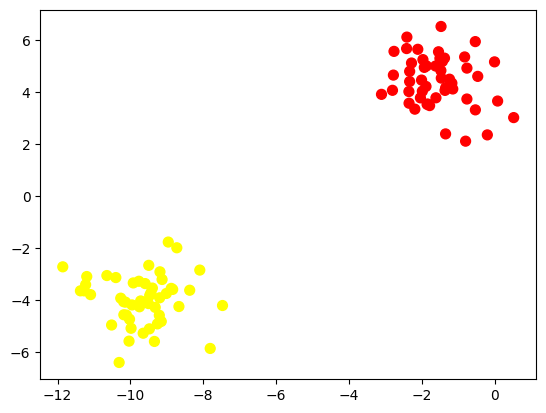

In [2]:
#Plotando
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

Como nossos vetores de características são representados por números reais, vamos utilizar uma distribuição Gaussiana de probabilidades .

Podemos utilizar a API `norm` do pacote SciPy (norm porque a distribuição Gaussiana também é chamada de normal). Primeiramente precisamos encontrar os parâmetros da distribuição, i.e., média e desvio padrão, e então a função de probabilidade da densidade pode ser amostrada para um valor específico usando a função `norm.pdf`.

In [3]:
# ajusta a distribuição de probabilidade para um conjunto de dados com uma única dimensão (univariado)
def fit_distribution(data):
    # estima os parâmetros
    mu = np.mean(data)
    sigma = np.std(data)
    print(mu, sigma)
    # ajusta a distribuição
    dist = norm(mu, sigma)
    return dist

Lembrando que queremos computar a probabilidade condicional para cada característica do nosso vetor de características (por isso univariado). Isso significa que precisaremos de uma distribuição para cada característica, e um conjunto de distribuições para cada rótulo, somando 4 distribuições no total.

Para isso, primeiro vamos dividir os dados por classes.

In [4]:
# separando os dados por classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)

(50, 2) (50, 2)


Podemos então usar esses grupos para calcular as probabilidades a priori para as amostragens pertencentes a cada grupo.

Essa probabilidade será de 50%, uma vez que criamos o dataset com o mesmo número de amostras para cada classe.

In [5]:
# calculando as probabilidades a priori
priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)
print(priory0, priory1)

0.5 0.5


Finalmente, podemos chamar a função `fit_distribution()` que definimos para preparar a probabilidade de distribuição para cara característica e para cada classe.

In [6]:
# cria as funções de probabilidade de densidade para y==0
X1y0 = fit_distribution(Xy0[:, 0])
X2y0 = fit_distribution(Xy0[:, 1])

# cria as funções de probabilidade de densidade para y==1
X1y1 = fit_distribution(Xy1[:, 0])
X2y1 = fit_distribution(Xy1[:, 1])

-1.5632888906409914 0.787444265443213
4.426680361487157 0.958296071258367
-9.681177100524485 0.8943078901048118
-3.9713794295185845 0.9308177595208521


Acima são mostradas as médias e desvios para cada uma das 4 combinações de classes e características.

Na sequência, vamos preparar o modelo probabilístico para fazer a predição.

A probabilidade condicional independente para cada rótulo pode ser computado usando a probabilidade da classe a priori e a probabilidade condicional do valor de cada característica.

A função de probabilidade a seguir executa esse cálculo para cada amostra (representada por um array de 2 características) dadas as probabilidades a priori e a distribuição de probabilidade condicional para cada variável. O valor retornado é uma pontuação em vez da probabilidade, uma vez que não está normalizado.

In [7]:
def probability(X, prior, dist1, dist2):
    return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

Podemos usar essa função para calcular a probabilidade para uma amostra pertencente a cada classe.

Primeiramente, vamos selecionar um exemplo a ser classificado; nesse exemplo, a primeira amostra do dataset.

In [8]:
# classificando a primeira amostra do dataset
Xsample, ysample = X[0], y[0]

Em seguida, vamos computar a pontuação de uma amostra como pertencente a primeira classe, e depois como da segunda classe e mostrar os resultados.

In [9]:
py0 = probability(Xsample, priory0, X1y0, X2y0)
py1 = probability(Xsample, priory1, X1y1, X2y1)
print('P(y=0 | %s) = %.3f' % (Xsample, py0*100))
print('P(y=1 | %s) = %.3f' % (Xsample, py1*100))

P(y=0 | [-0.79415228  2.10495117]) = 0.348
P(y=1 | [-0.79415228  2.10495117]) = 0.000


Se quisermos ver as probabilidades em vez dessa pontuação, basta normalizarmos esses valores

In [10]:
denominator = py0*100 + py1*100

print('P(y=0 | %s) = %.3f' % (Xsample, py0*100/denominator))
print('P(y=1 | %s) = %.3f' % (Xsample, py1*100/denominator))

# rotulo real
print('Verdadeiro: y=%d' % ysample)

P(y=0 | [-0.79415228  2.10495117]) = 1.000
P(y=1 | [-0.79415228  2.10495117]) = 0.000
Verdadeiro: y=0


Nesse caso, o algoritmo nos deu 100% de certeza de que a amostra é da classe 0.

Na prática, é uma boa ideia usar uma versão otimizada do Naive Bayes, como as implementadas no scikit-learn. Lá temos 3 versões, BernoulliNB, MultinomialNB e GaussianNB, para as versões com distribuições binomial, multinomial e Gaussiana, respectivamente.


## Implementação no scikit-learn

In [11]:
# exemplo usando Naive Bayes Gaussiano
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

# gera um dataset com 100 amostras, 2 classes e 2 dimensões
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

# define o modelo usando distribuição gaussiana
model = GaussianNB()

# ajusta o modelo
model.fit(X, y)

# escolhe uma única amostra
Xsample, ysample = [X[0]], y[0]

# faz uma estimativa da probabilidade
yhat_prob = model.predict_proba(Xsample)
print('Probabilidade estimada: ', yhat_prob)

# faz a predição do rótulo
yhat_class = model.predict(Xsample)
print('Classe predita: pred=%d' % yhat_class[0])
print('Original: y=%d' % ysample)

Probabilidade estimada:  [[1.00000000e+00 5.52387327e-30]]
Classe predita: pred=0
Original: y=0


## Quando usar Naive Bayes

Uma vez que o classificador Bayesiano assume a não dependência entre os dados, no geral ele não é tão bom quanto outros classificadores mais complexos. Dito isso, podemos observar algumas vantagens:

- É extremamente rápido tanto para treinamento quanto para inferência
- Oferece uma predição de probabilidades
- Facilmente interpretável
- Poucos ou nenhum hiperparâmetro a ser otimizado

Essas vantagens podem indicar que o classificador Naive Bayes pode ser frequentemente uma boa escolha como um _baseline_ para classificação. Se der bons resultados, temos um classificador bom, rápido e interpretável para o problema. Caso contrário, podemos explorar modelos mais complexos e podemos usá-lo para comparar os resultados.

O Naive Bayes tende a funcionar especialmente bem para alguns casos:

- Quando a suposição "ingênua" de fato se ajusta aos dados (muito raro na prática)
- Para classes muito bem separadas, quando a complexidade não é muito importante
- Para dados com dimensionalidade muito alta em que a complexidade não seja importante

Os dois últimos pontos parecem diferentes, mas estão relacionados: quando a dimensionalidade do dataset aumenta, é muito menos provável que dois pontos sejam encontrados juntos (ou seja, eles precisariam estar próximos em TODAS as dimensões para estarem próximos de fato). Isso significa que agrupamentos em alta dimensionalidade tendem a ser mais separáveis, em média, que agrupamentos em baixa dimensionalidade, assumindo que as novas dimensões de fato agreguem informações importantes. Por isso, classificadores mais simplistas como o Naive Bayes tendem a funcionar tão bem ou melhor que alguns classificadores mais complexos conforme a dimensionalidade cresce: uma vez que tem dados suficiente, até mesmo modelos simples podem se tornar poderosos.


# Exercício:

1. Utilizar ao menos dois dataset (ex: Iris, MNIST, Fashion MNIST) e rodar o Classificador de Bayes para comparar com o Regressor Logístico;
2. Analisar o comportamento do classificador e dos dados (métricas de avaliação + análise gráfica das classes dos bancos em análise))